## Data Preprocessing - 2

Import statements

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder


In [101]:
c_fraud_df = pd.read_csv("corrected_names.csv")
c_fraud_df.head()

,Unnamed: 0,Call Type,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Conversation
0,0,Normal,+1-702-799-9712,16:52:14,196,10,11,"Hope. Since ago travelled, he has forgotten hi..."
1,1,Normal,+1-718-904-8846,16:31:40,167,3,9,Horrible you eat mass eat until u forgot about...
2,2,Normal,+1-213-994-7866,16:07:57,253,5,23,Great! I have to run now so ttyl!
3,3,Normal,+1-646-224-4035,18:09:03,162,2,4,"Sorry, I'll call later"
4,4,Normal,+1-205-414-2609,10:25:10,127,6,31,"Jay wants to work out first, how's 4 sound?"


In [102]:
c_fraud_df.drop('Unnamed: 0',axis=1,inplace=True)

In [103]:
c_fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17590 entries, 0 to 17589
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Call Type                17590 non-null  object
 1   Caller Number            17590 non-null  object
 2   Call Time                17590 non-null  object
 3   Call Duration(in s)      17590 non-null  int64 
 4   Call Frequency Per Day   17590 non-null  int64 
 5   Call Frequency Per Week  17590 non-null  int64 
 6   Conversation             17590 non-null  object
dtypes: int64(3), object(4)
memory usage: 962.1+ KB


In [104]:
c_fraud_df["Conversation"].fillna('', inplace=True)
c_fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17590 entries, 0 to 17589
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Call Type                17590 non-null  object
 1   Caller Number            17590 non-null  object
 2   Call Time                17590 non-null  object
 3   Call Duration(in s)      17590 non-null  int64 
 4   Call Frequency Per Day   17590 non-null  int64 
 5   Call Frequency Per Week  17590 non-null  int64 
 6   Conversation             17590 non-null  object
dtypes: int64(3), object(4)
memory usage: 962.1+ KB


C:\Users\achal\AppData\Local\Temp\ipykernel_22248\1389048123.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_fraud_df["Conversation"].fillna('', inplace=True)


In [105]:
c_fraud_df['Call Frequency Per Day'] = c_fraud_df['Call Frequency Per Day'].astype(int)
c_fraud_df['Call Frequency Per Week'] = c_fraud_df['Call Frequency Per Week'].astype(int)
c_fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17590 entries, 0 to 17589
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Call Type                17590 non-null  object
 1   Caller Number            17590 non-null  object
 2   Call Time                17590 non-null  object
 3   Call Duration(in s)      17590 non-null  int64 
 4   Call Frequency Per Day   17590 non-null  int64 
 5   Call Frequency Per Week  17590 non-null  int64 
 6   Conversation             17590 non-null  object
dtypes: int64(3), object(4)
memory usage: 962.1+ KB


Converting Call time to time series data


In [106]:
c_fraud_df['Call Time'] = pd.to_datetime(c_fraud_df['Call Time'], format='%H:%M:%S')
c_fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17590 entries, 0 to 17589
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Call Type                17590 non-null  object        
 1   Caller Number            17590 non-null  object        
 2   Call Time                17590 non-null  datetime64[ns]
 3   Call Duration(in s)      17590 non-null  int64         
 4   Call Frequency Per Day   17590 non-null  int64         
 5   Call Frequency Per Week  17590 non-null  int64         
 6   Conversation             17590 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 962.1+ KB


In [107]:
c_fraud_df.dtypes

Call Type                          object
Caller Number                      object
Call Time                  datetime64[ns]
Call Duration(in s)                 int64
Call Frequency Per Day              int64
Call Frequency Per Week             int64
Conversation                       object
dtype: object

In [108]:
c_fraud_df.describe(include='all')

,Call Type,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Conversation
count,17590,17590,17590,17590.000000,17590.000000,17590.000000,17590
unique,3,17589,NaN,NaN,NaN,NaN,10039
top,Normal,+1-917-965-2607,NaN,NaN,NaN,NaN,"Sorry, I'll call later"
freq,15403,2,NaN,NaN,NaN,NaN,80
mean,NaN,NaN,1900-01-01 15:21:51.891415552,296.194031,5.161285,19.267254,NaN
min,NaN,NaN,1900-01-01 07:00:13,10.000000,1.000000,1.000000,NaN
25%,NaN,NaN,1900-01-01 11:37:02,131.000000,3.000000,10.000000,NaN
50%,NaN,NaN,1900-01-01 16:08:27,224.000000,4.000000,15.000000,NaN
75%,NaN,NaN,1900-01-01 18:36:54,391.000000,7.000000,27.000000,NaN
max,NaN,NaN,1900-01-01 23:59:55,1835.000000,15.000000,80.000000,NaN


In [109]:
value_counts_1 = c_fraud_df["Call Type"].value_counts()

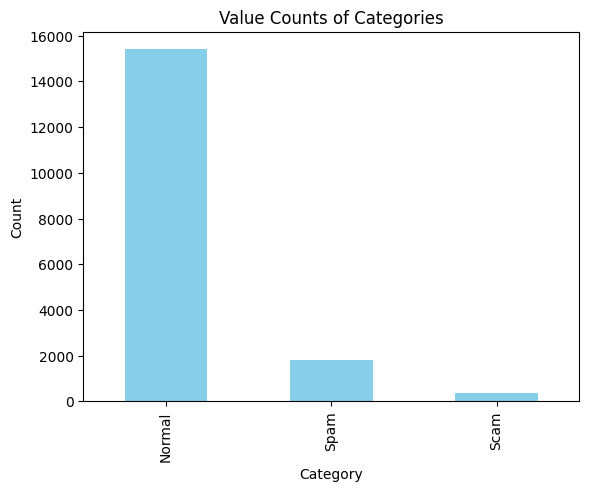

In [110]:
value_counts_1.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Value Counts of Categories')
plt.show()

#It is very much clear from the below graph that there exists a class imbalance. Therefore there is a necessity for Oversampling.

Label Encoding

In [111]:
#Initial encoding just for examining data
c_fraud_df.loc[c_fraud_df['Call Type']=='Normal','Call Type'] = 0
c_fraud_df.loc[c_fraud_df['Call Type']=='Spam','Call Type'] = 1
c_fraud_df.loc[c_fraud_df['Call Type']=='Scam','Call Type'] = 2

# le = LabelEncoder()
# c_fraud_df['Call Type'] = le.fit_transform(c_fraud_df["Call Type"])
# c_fraud_df

#LabelEncoding defines an order i.e 2 is high and 1 is low sort of. Therefore use manual encoding procedure


In [112]:
c_fraud_df.head()

,Call Type,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Conversation
0,0,+1-702-799-9712,1900-01-01 16:52:14,196,10,11,"Hope. Since ago travelled, he has forgotten hi..."
1,0,+1-718-904-8846,1900-01-01 16:31:40,167,3,9,Horrible you eat mass eat until u forgot about...
2,0,+1-213-994-7866,1900-01-01 16:07:57,253,5,23,Great! I have to run now so ttyl!
3,0,+1-646-224-4035,1900-01-01 18:09:03,162,2,4,"Sorry, I'll call later"
4,0,+1-205-414-2609,1900-01-01 10:25:10,127,6,31,"Jay wants to work out first, how's 4 sound?"


Encoding format For call type:

Normal = 0

Spam = 1

Scam = 2


In [113]:
c_fraud_df.describe(include='all')

,Call Type,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Conversation
count,17590.0,17590,17590,17590.000000,17590.000000,17590.000000,17590
unique,3.0,17589,NaN,NaN,NaN,NaN,10039
top,0.0,+1-917-965-2607,NaN,NaN,NaN,NaN,"Sorry, I'll call later"
freq,15403.0,2,NaN,NaN,NaN,NaN,80
mean,NaN,NaN,1900-01-01 15:21:51.891415552,296.194031,5.161285,19.267254,NaN
min,NaN,NaN,1900-01-01 07:00:13,10.000000,1.000000,1.000000,NaN
25%,NaN,NaN,1900-01-01 11:37:02,131.000000,3.000000,10.000000,NaN
50%,NaN,NaN,1900-01-01 16:08:27,224.000000,4.000000,15.000000,NaN
75%,NaN,NaN,1900-01-01 18:36:54,391.000000,7.000000,27.000000,NaN
max,NaN,NaN,1900-01-01 23:59:55,1835.000000,15.000000,80.000000,NaN


Including additional columns out of existing features for plotting and analysis

In [114]:
c_fraud_df.head()

,Call Type,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Conversation
0,0,+1-702-799-9712,1900-01-01 16:52:14,196,10,11,"Hope. Since ago travelled, he has forgotten hi..."
1,0,+1-718-904-8846,1900-01-01 16:31:40,167,3,9,Horrible you eat mass eat until u forgot about...
2,0,+1-213-994-7866,1900-01-01 16:07:57,253,5,23,Great! I have to run now so ttyl!
3,0,+1-646-224-4035,1900-01-01 18:09:03,162,2,4,"Sorry, I'll call later"
4,0,+1-205-414-2609,1900-01-01 10:25:10,127,6,31,"Jay wants to work out first, how's 4 sound?"


In [115]:
print(type(c_fraud_df['Call Time'].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [116]:
c_fraud_df['Hour'] = c_fraud_df['Call Time'].dt.hour
c_fraud_df.head()

,Call Type,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Conversation,Hour
0,0,+1-702-799-9712,1900-01-01 16:52:14,196,10,11,"Hope. Since ago travelled, he has forgotten hi...",16
1,0,+1-718-904-8846,1900-01-01 16:31:40,167,3,9,Horrible you eat mass eat until u forgot about...,16
2,0,+1-213-994-7866,1900-01-01 16:07:57,253,5,23,Great! I have to run now so ttyl!,16
3,0,+1-646-224-4035,1900-01-01 18:09:03,162,2,4,"Sorry, I'll call later",18
4,0,+1-205-414-2609,1900-01-01 10:25:10,127,6,31,"Jay wants to work out first, how's 4 sound?",10


In [117]:
c_fraud_df['Hour'].value_counts()
#We can see that the hour of 7 in the morning is the time at which most of the calls in US are made followed by 3 in the afternoon
#Least number of calls are made as it follows to night time

Hour
17    1994
16    1950
21    1393
11    1285
10    1251
19    1158
20    1124
18    1100
14     981
15     973
13     887
9      876
8      872
12     789
7      618
22     170
23     169
Name: count, dtype: int64

In [118]:
c_fraud_df['Area Code'] = c_fraud_df['Caller Number'].str[3:6]
c_fraud_df.head()

,Call Type,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Conversation,Hour,Area Code
0,0,+1-702-799-9712,1900-01-01 16:52:14,196,10,11,"Hope. Since ago travelled, he has forgotten hi...",16,702
1,0,+1-718-904-8846,1900-01-01 16:31:40,167,3,9,Horrible you eat mass eat until u forgot about...,16,718
2,0,+1-213-994-7866,1900-01-01 16:07:57,253,5,23,Great! I have to run now so ttyl!,16,213
3,0,+1-646-224-4035,1900-01-01 18:09:03,162,2,4,"Sorry, I'll call later",18,646
4,0,+1-205-414-2609,1900-01-01 10:25:10,127,6,31,"Jay wants to work out first, how's 4 sound?",10,205


In [119]:
c_fraud_df['Area Code'].value_counts()
#We can see that highest number of calls are made from New York City followed by Pennysylvania. After those two there is almost an equal distribution

Area Code
572    1798
917    1511
213    1368
505    1317
718    1242
323    1207
313     648
832     641
872     618
702     613
646     612
214     608
619     607
470     576
205     576
267     575
415     575
484     531
206     527
480     525
615     513
617      74
915      45
508      43
417      36
482      34
912      33
306      32
628      30
314      26
919      25
318      24
Name: count, dtype: int64

Checking Correlations and plotting more graphs

In [120]:
columns_to_exclude = ['Caller Number','Conversation']
correlations = c_fraud_df.drop(columns=columns_to_exclude).corr()
correlations['Call Type']

Call Type                  1.000000
Call Time                  0.032230
Call Duration(in s)        0.038805
Call Frequency Per Day     0.501463
Call Frequency Per Week    0.549591
Hour                       0.032222
Area Code                  0.099710
Name: Call Type, dtype: float64

Plotting Spam and Scam calls against hour and area code to check correlation

In [121]:
normal_calls = c_fraud_df[c_fraud_df['Call Type'] == 0]
normal_calls.reset_index(drop=True,inplace=True)
normal_calls.tail()

,Call Type,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Conversation,Hour,Area Code
15398,0,+1-267-526-7306,1900-01-01 12:33:51,1099,5,29,K. To april. Want wait,12,267
15399,0,+1-484-516-9897,1900-01-01 11:05:41,558,3,5,Its ok my arm is feeling weak cut i got a shot...,11,484
15400,0,+1-572-956-2626,1900-01-01 18:15:23,264,5,35,Ouh means computational science... Y they like...,18,572
15401,0,+1-505-431-2717,1900-01-01 11:38:46,225,6,18,"Sorry, I'll call later",11,505
15402,0,+1-646-905-6567,1900-01-01 20:33:31,214,4,26,You are a very very very very bad girl. Or lady.,20,646


In [122]:
spam_calls = c_fraud_df[c_fraud_df['Call Type'] == 1]
spam_calls.reset_index(drop=True,inplace=True)
spam_calls.tail()

,Call Type,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Conversation,Hour,Area Code
1822,1,+1-832-615-5253,1900-01-01 20:29:24,66,11,54,Our dating service has been asked 2 contact U ...,20,832
1823,1,+1-313-749-6435,1900-01-01 18:38:15,63,14,30,GENT! We are trying to contact you. Last weeke...,18,313
1824,1,+1-313-452-6863,1900-01-01 10:31:41,73,7,33,Get your garden ready for summer with a FREE s...,10,313
1825,1,+1-323-638-6187,1900-01-01 18:43:20,72,8,42,dating:i have had two of these. Only started a...,18,323
1826,1,+1-205-459-3322,1900-01-01 18:14:51,92,9,19,Met your garden ready for summer with a FREE s...,18,205


In [123]:
scam_calls = c_fraud_df[c_fraud_df['Call Type'] == 2]
scam_calls.reset_index(drop=True,inplace=True)
scam_calls.tail()

,Call Type,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Conversation,Hour,Area Code
355,2,+1-646-721-3264,1900-01-01 16:59:54,405,6,45,His is the and time we have tried 2 contact u....,16,646
356,2,+1-917-340-7444,1900-01-01 19:06:40,843,8,31,You have won a Foka 7250i. His is what you get...,19,917
357,2,+1-306-582-5803,1900-01-01 15:53:46,772,13,30,His is the and time we have tried to contact u...,15,306
358,2,+1-323-549-3494,1900-01-01 13:13:52,1798,8,35,Congratulations YOU'of On. You're a Dinner in ...,13,323
359,2,+1-213-971-4461,1900-01-01 10:42:06,756,7,20,Urgent! Please call 09061743811 from lanoline....,10,213


In [124]:
combined_df = pd.concat([scam_calls, spam_calls], ignore_index=True)
shuffled_df = combined_df.sample(frac=1,random_state=40).reset_index(drop=True)
shuffled_df.head()

,Call Type,Caller Number,Call Time,Call Duration(in s),Call Frequency Per Day,Call Frequency Per Week,Conversation,Hour,Area Code
0,2,+1-313-772-5754,1900-01-01 18:34:18,998,6,39,A family member has been in an accident. Call...,18,313
1,1,+1-619-403-4684,1900-01-01 12:19:55,75,4,57,You have won a Nokia 7250i. This is what you g...,12,619
2,1,+1-628-351-6873,1900-01-01 18:44:45,63,11,40,Congrats! 1 year special cinema pass for 2 is ...,18,628
3,1,+1-617-438-9736,1900-01-01 23:25:10,73,7,28,FREE for 1st week! No1 Nokia tone 4 ur mobile ...,23,617
4,1,+1-917-472-9560,1900-01-01 18:20:43,72,6,71,"Hi this is Amy, we will be sending you a free ...",18,917


In [125]:
scsp_counts = shuffled_df['Hour'].value_counts().sort_index()
scsp_counts.head()

Hour
7      40
8     111
9     125
10    176
11    202
Name: count, dtype: int64

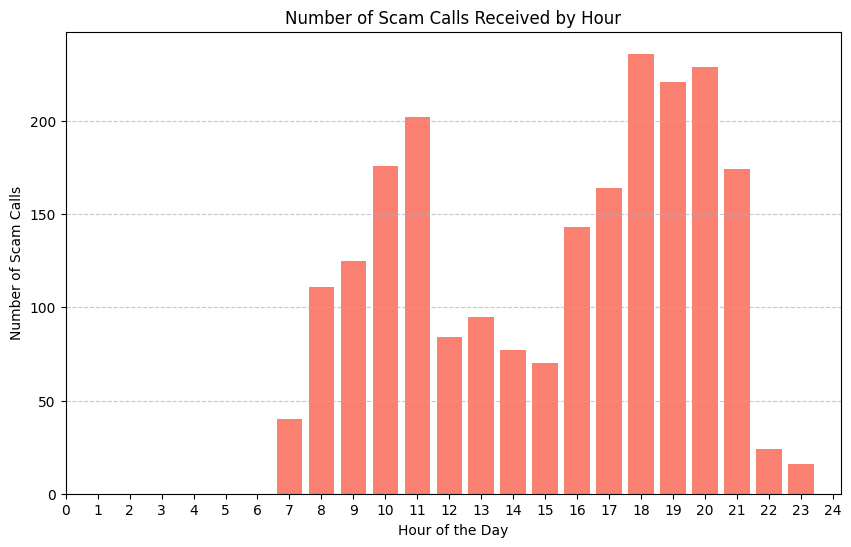

In [126]:
plt.figure(figsize=(10, 6))
plt.bar(scsp_counts.index, scsp_counts.values, color='#FA8072')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Scam Calls')
plt.title('Number of Scam Calls Received by Hour')
plt.xticks(range(0, 25))  # Show all hours from 0 to 24
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#This graph clearly shows that hour or time itself has no significance as scam and spam calls are evenly distributed

In [127]:
scsp_area_code_counts = shuffled_df['Area Code'].value_counts().sort_index()
scsp_area_code_counts.head()

Area Code
205     64
213    230
267     28
306     32
313     90
Name: count, dtype: int64

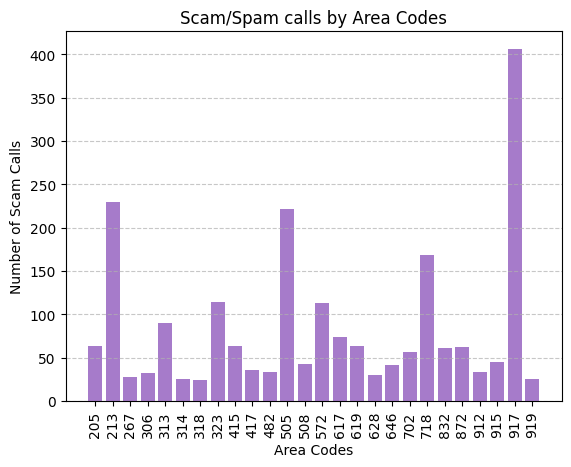

In [128]:
plt.bar(scsp_area_code_counts.index, scsp_area_code_counts.values, color='#A67BCA')
plt.xlabel('Area Codes')
plt.ylabel('Number of Scam Calls')
plt.title('Scam/Spam calls by Area Codes')
plt.xticks(rotation = 90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Therefore it can be said that most of the scam calls or spam calls engage in neutral or positive sentiments and don't use negative sentiment
#Therefore sentiment analysis row is also loosely correlated

In [129]:
nor_counts = normal_calls['Area Code'].value_counts().sort_index()
nor_counts.count()

np.int64(21)

In [130]:
sc_counts = scam_calls['Area Code'].value_counts().sort_index()
sc_counts.head()

Area Code
205    12
213    37
267     4
306     9
313    11
Name: count, dtype: int64

In [131]:
sp_counts = spam_calls['Area Code'].value_counts().sort_index()
sp_counts.head()

Area Code
205     52
213    193
267     24
306     23
313     79
Name: count, dtype: int64

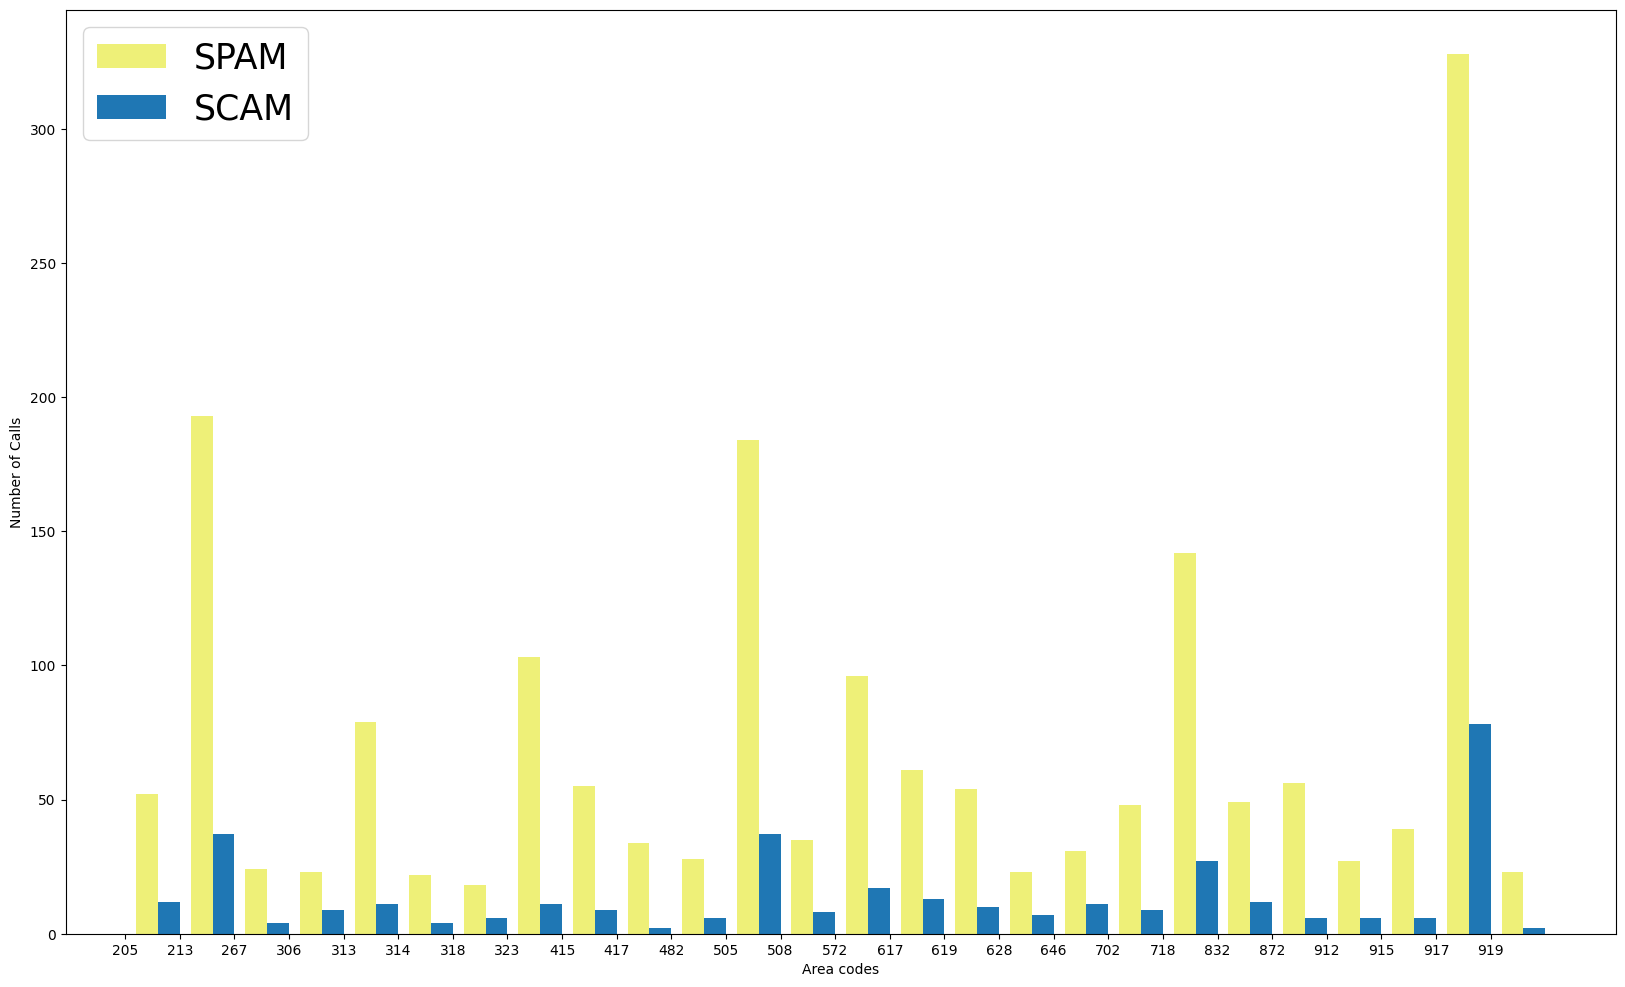

In [132]:
codes = set([ '213', '572', '718', '213', '718', '832', '917', '323', '213', '917', '505', '628', '718',
'313', '718', '872', '572', '323', '323', '213', '646', '917', '917', '205', '917', '718', '915', '917', '572', '213', '205',
'702', '505', '505', '917', '617','718', '572', '917', '832', '213', '306', '505', '318', '313','718', '617','917', '415', '505', '267', '505',
'917', '323', '718', '313', '505', '919', '915', '702','508', '417', '415', '619', '314','917', '482', '872', '213', '912','619','917' ])
codes = sorted(codes)
plt.figure(figsize=(20,12))
width = 0.4
values = np.arange(len(sp_counts))
# plt.bar(values,nor_counts.values,width=width,color = '#a3386c',label = 'NORMAL')
plt.bar(values+width,sp_counts.values,width= width, color = '#EEF078',label = 'SPAM')
plt.bar(values+width+width,sc_counts.values,width=width,label = 'SCAM')
plt.xlabel('Area codes')
plt.ylabel('Number of Calls')
plt.xticks(np.arange(len(codes)),labels=codes)
plt.legend(fontsize = 25)
plt.show()